In [1]:
import quandl
import datetime as dt
import matplotlib.pyplot as plt

today=dt.date.today()
thirty_days=dt.timedelta(days=30)
thirty_days_ago=today-thirty_days
data = quandl.get("WIKI/AAPL", start_date=str(thirty_days_ago), end_date=str(today),column_index=4)
data.plot();
plt.show()
#data

In [2]:
#https://stackoverflow.com/questions/44088894/quandl-stock-api-historical-data

In [27]:
#WTI Data#
WTI_daily = quandl.get("WIKI/AAPL", collapse="daily",trim_start="1986-10-10", trim_end="1986-10-15")
#WTI_daily.columns = ['WTI']
WTI_daily

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1986-10-10,32.88,33.38,32.38,33.25,261300.0,0.0,1.0,0.483429,0.490780,0.476077,0.488869,14632800.0
1986-10-13,33.13,34.63,33.00,34.63,445000.0,0.0,1.0,0.487104,0.509158,0.485193,0.509158,24920000.0
1986-10-14,34.63,35.25,33.75,34.00,889900.0,0.0,1.0,0.509158,0.518274,0.496220,0.499896,49834400.0
1986-10-15,33.50,33.50,32.75,33.38,917000.0,0.0,1.0,0.492544,0.492544,0.481517,0.490780,51352000.0


In [3]:
import pandas as pd
import os
import quandl
import time

auth_tok = "1LkmpypqJskJzKcpd2TV"

data = quandl.get("WIKI/KO", trim_start = "2000-12-12", trim_end = "2014-12-30", authtoken=auth_tok)

print(data)

             Open     High     Low  Close      Volume  Ex-Dividend  \
Date                                                                 
2000-12-12  57.69  58.6900  57.630  58.00   4004100.0        0.000   
2000-12-13  57.75  58.3100  57.250  57.81   3704900.0        0.000   
2000-12-14  56.00  57.4400  55.750  57.00   5023800.0        0.000   
2000-12-15  55.00  56.6900  53.500  53.50  13770200.0        0.000   
2000-12-18  54.00  55.5600  53.630  54.88   5152300.0        0.000   
2000-12-19  54.69  57.9400  54.690  56.75   5844100.0        0.000   
2000-12-20  55.75  58.0000  55.560  56.25   6672100.0        0.000   
2000-12-21  56.25  59.6300  56.130  59.38   5965400.0        0.000   
2000-12-22  58.81  59.0000  57.500  58.88   3741800.0        0.000   
2000-12-26  58.88  60.0000  58.620  60.00   2835000.0        0.000   
2000-12-27  60.00  61.3800  60.000  60.56   3855500.0        0.000   
2000-12-28  61.94  61.9400  60.560  61.06   2760400.0        0.000   
2000-12-29  60.94  6

In [4]:
# import ffn
# returns = ffn.get('aapl,msft,c,gs,ge', start='2010-01-01').to_returns().dropna()
# returns.calc_mean_var_weights().as_format('.2%')

In [5]:
#https://blog.quandl.com/api-for-housing-data

In [21]:

#
MORTG = quandl.get("FMAC/MORTG", trim_start = "2000-01-01", trim_end = "2018-03-01", authtoken=auth_tok)
UNRATE = quandl.get("FRED/UNRATE", trim_start = "2000-01-01", trim_end = "2018-03-01", authtoken=auth_tok)
#USA_NGDP_RPCH = quandl.get("ODA/USA_NGDP_RPCH", trim_start = "2010-01-01", trim_end = "2018-03-01", authtoken=auth_tok)
CPI_USA = quandl.get("RATEINF/CPI_USA", trim_start = "2000-12-12", trim_end = "2018-03-01", authtoken=auth_tok)
HPI = quandl.get("FMAC/HPI", trim_start = "2000-12-12", trim_end = "2018-03-01", authtoken=auth_tok)


#FMAC/HPI

#ODA/USA_NGDP_RPCH

#FRED/UNRATE

#print(data)

In [22]:
#quandl.get("RATEINF/CPI_USA", trim_start = "2000-12-12", trim_end = "2014-12-30", authtoken=auth_tok)

#RATEINF/INFLATION_USA

data_frames = [MORTG, UNRATE, CPI_USA]


In [23]:

data_frames[0]=data_frames[0].pct_change()
data_frames[1]=data_frames[1].pct_change()


df2 = pd.merge(data_frames[0], data_frames[1], left_index=True, right_index=True)
#df3 =  pd.merge(df2, data_frames[2], left_index=True, right_index=True)
#MORTG.join(UNRATE)

df2['month'] = pd.DatetimeIndex(df2.index).month
df2['year'] = pd.DatetimeIndex(df2.index).year



df2['month'] = pd.DatetimeIndex(df2.index).month # +1 
df2['year'] = pd.DatetimeIndex(df2.index).year

df2.head()

,Value_x,Value_y,month,year
Date,,,,
2000-01-01,NaN,NaN,1,2000
2000-02-01,0.014616,0.025000,2,2000
2000-03-01,-0.010804,-0.024390,3,2000
2000-04-01,-0.010922,-0.050000,4,2000
2000-05-01,0.045399,0.052632,5,2000


In [24]:
#CPI_USA

df7 = CPI_USA
df7= df7.pct_change()

df7['month'] = pd.DatetimeIndex(df7.index).month # +1 
df7['year'] = pd.DatetimeIndex(df7.index).year

df7

df8 = pd.merge(df2, df7, left_on=['month', 'year'],right_on=['month', 'year'])



df8.rename(columns={'Value_x':'mortgrate', 'Value_y':'unemp','Value': 'cpi' }, inplace=True)

df8.to_pickle('mortunempcpi.p')

#temp = CPI_USA['Date'].apply(np.ceil).apply(lambda x: pd.Timedelta(x, unit='D'))
#CPI_USA.index = CPI_USA.index +1 

In [25]:
df8

,mortgrate,unemp,month,year,cpi
0,-0.047742,0.000000,12,2000,NaN
1,-0.047425,0.076923,1,2001,0.006322
2,0.002845,0.000000,2,2001,0.003998
3,-0.014184,0.023810,3,2001,0.002275
4,0.018705,0.023256,4,2001,0.003973
5,0.009887,-0.022727,5,2001,0.004522
6,0.001399,0.046512,6,2001,0.001688
7,-0.004190,0.022222,7,2001,-0.002809
8,-0.025245,0.065217,8,2001,0.000000
9,-0.018705,0.020408,9,2001,0.004507


In [26]:
import pandas as pd;
from functools import reduce;
# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
#                                             how='outer'), data_frames)

#df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],how='inner'), data_frames).fillna('void')


In [27]:
HPIUS = pd.DataFrame (HPI['United States seasonaly adjusted'].pct_change())
# That is by state
HPIUS.head()


HPIUS['month'] = pd.DatetimeIndex(HPIUS.index).month # +1 
HPIUS['year'] = pd.DatetimeIndex(HPIUS.index).year

df9 = pd.merge(HPIUS, df8, left_on=['month', 'year'],right_on=['month', 'year'])
df9 = df9.dropna()

df9.rename(columns={'United States seasonaly adjusted':'HPIUS'}, inplace=True)
df9



,HPIUS,month,year,mortgrate,unemp,cpi
1,0.006723,1,2001,-0.047425,0.076923,0.006322
2,0.006981,2,2001,0.002845,0.000000,0.003998
3,0.006864,3,2001,-0.014184,0.023810,0.002275
4,0.005696,4,2001,0.018705,0.023256,0.003973
5,0.005205,5,2001,0.009887,-0.022727,0.004522
6,0.005134,6,2001,0.001399,0.046512,0.001688
7,0.005546,7,2001,-0.004190,0.022222,-0.002809
8,0.005405,8,2001,-0.025245,0.065217,0.000000
9,0.005611,9,2001,-0.018705,0.020408,0.004507
10,0.005587,10,2001,-0.029326,0.060000,-0.003365


In [28]:


df9['Date'] = df9['month'].astype(str) + ' ' +df9['year'].astype(str)
df9['Date']=  pd.to_datetime(df9['Date'], format='%m %Y')

df9.set_index('Date', inplace=True)
df9

df9.to_pickle('mortunempcpihpi.p')


In [29]:
# from datetime import datetime
# datestring = "3 2015"
# dt = datetime.strptime(datestring, '%m %Y')
# print (dt.year, dt.month, dt.day)

Index(['HPIUS', 'month', 'year', 'mortgrate', 'unemp', 'cpi'], dtype='object')

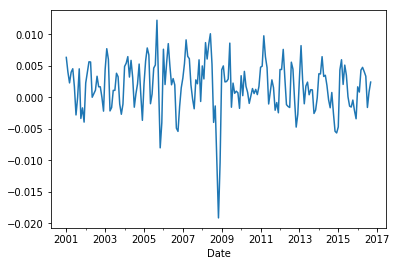

In [30]:
df9.cpi.plot()
df9.columns

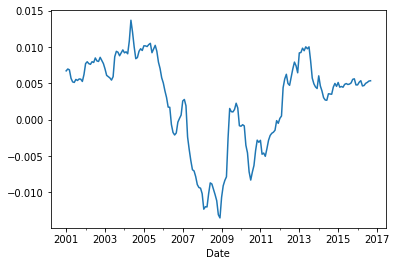

In [31]:
df9.HPIUS.plot()

In [42]:
import statsmodels.api as sm
X = df9[[ 'mortgrate', 'unemp', 'cpi']]
y = df9['HPIUS']
## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  HPIUS   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     7.756
Date:                Sat, 07 Apr 2018   Prob (F-statistic):           6.60e-05
Time:                        14:12:08   Log-Likelihood:                 700.69
No. Observations:                 189   AIC:                            -1393.
Df Residuals:                     185   BIC:                            -1380.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.000      5.796      0.000       0.002       0.004
mortgrate      0.0229      0.013      1.712      0.089      -0.004       0.049
unemp         -0.0681      0.016     -4.150      0.000      -0.100      -0.036
cpi            0.0424      0.112      0.379      0.705      -0.178       0.263
==============================================================================
Omnibus:                       14.644   Durbin-Watson:                   0.208
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.212
Skew:                          -0.614   Prob(JB):                     0.000820
Kurtosis:                       2.457   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


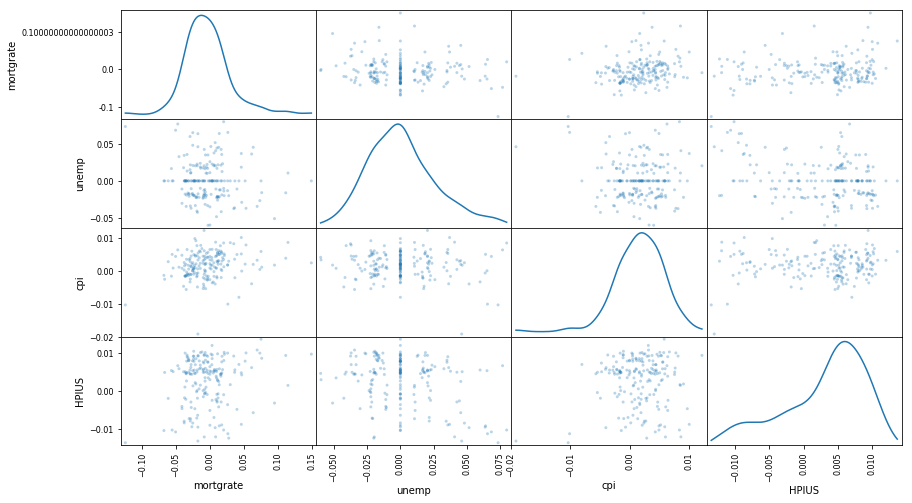

In [43]:
pd.scatter_matrix(df9[[ 'mortgrate', 'unemp', 'cpi', 'HPIUS']], alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [32]:

popdata  = pd.read_pickle("mergeddfclean.p")

In [33]:
popdata

,county,RDEATH2016,Year,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price
0,Autauga AL,9.218433,2011-01-01,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568
1,Baldwin AL,9.868812,2011-01-01,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731
2,Barbour AL,11.632586,2011-01-01,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495
4,Blount AL,9.871136,2011-01-01,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218
7,Chambers AL,12.950211,2011-01-01,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399
8,Cherokee AL,11.911623,2011-01-01,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970
10,Coffee AL,10.092682,2011-01-01,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972
11,Colbert AL,12.314073,2011-01-01,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720
12,Covington AL,12.890980,2011-01-01,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883
13,Cullman AL,11.309054,2011-01-01,-1.193043,1.056340,0.323116,-1.516159,12.365394,-0.104816


In [34]:
df10 = pd.merge(popdata, df9, left_on='Year',right_on='Date', right_index = True).dropna()


In [117]:
df10.set_index('Year', inplace=True)


In [118]:
df10 del

,county,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price,HPIUS,month,year,mortgrate,unemp,cpi
Year,,,,,,,,,,,,,,
2011-01-01,Autauga AL,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952,-0.024568,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Baldwin AL,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760,-0.093731,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Barbour AL,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454,-0.077495,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Blount AL,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798,-0.086218,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Chambers AL,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588,-0.194399,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Cherokee AL,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835,-0.148970,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Coffee AL,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022,-0.076972,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Colbert AL,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501,-0.017720,-0.002834,1,2011,0.010616,-0.021505,0.004763
2011-01-01,Covington AL,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570,-0.149883,-0.002834,1,2011,0.010616,-0.021505,0.004763
